# EvoClust

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
#fig=figure(facecolor='white')
plt.rcParams['figure.facecolor']='white'

In [22]:
# Load the data for processing
path = "/Users/magnus/work-src/evoClustRNA/benchmark/rnas"
#infs = pd.read_csv(path + '/ade_rmsd_motf.csv')
#infs

In [23]:
%%bash
ls /Users/magnus/work-src/evoClustRNA/benchmark/rnas

ade
gmp
rp13
rp14
rp17
thf
tpp
trna


In [24]:
import seaborn as sns
sns.set_style("whitegrid");
plt.rcParams['axes.linewidth'] = 10;
#plt.rcParams['axes.color'] = "black"
plt.style.use('classic');
plt.rc("figure", facecolor="white");
plt.rcParams['lines.linewidth'] = 2;

In [25]:
"""load the data"""
"""
policz rmsd do wszystkich struktur w folderu -> csv
wyplotuj wszystkie kazdy z nich, zrob to dla ade
Q: czy farna lub simrna sa lepsze? czy chmury dla jednej sekwencji ale dwoch przypadkow sie bardzo od siebie roznia?
Q: how I calc rmsd?
"""

rna = ['ade' , 'gmp', 'thf', 'tpp', 'trna', 'rp13', 'rp14', 'rp17']
#rna = ['rp14']
# here you can turn on and off various modes of the analysis
modes = [
         #'test',
         'farna1000', 
         'simrna1000', 
         'farna5x200', 
         'simrna5x200', 
         'simrna1x500farna1x500',
         'simrna5x100farna5x100'
        ]

def load_and_clean_up_data(path, rna, mode):
    fn = path + '/' + rna + '/evox/' + mode + '/rmsd_all_strucs.csv'

    try:
        df = pd.read_csv(fn)
        print('file: %s' % fn)
    except IOError:
        print('Missing file: %s' % fn)
        return None
    return df

file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/farna1000/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna1000/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/farna5x200/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna5x200/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna1x500farna1x500/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna5x100farna5x100/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/farna1000/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna1000/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/farna5x200/rmsd_all_strucs.csv
file: /Users/magnus/work-src/evoClustRNA/benchmark/rnas/ade/evox/simrna5x200/rmsd_all_strucs.csv
file: /Users/magnu

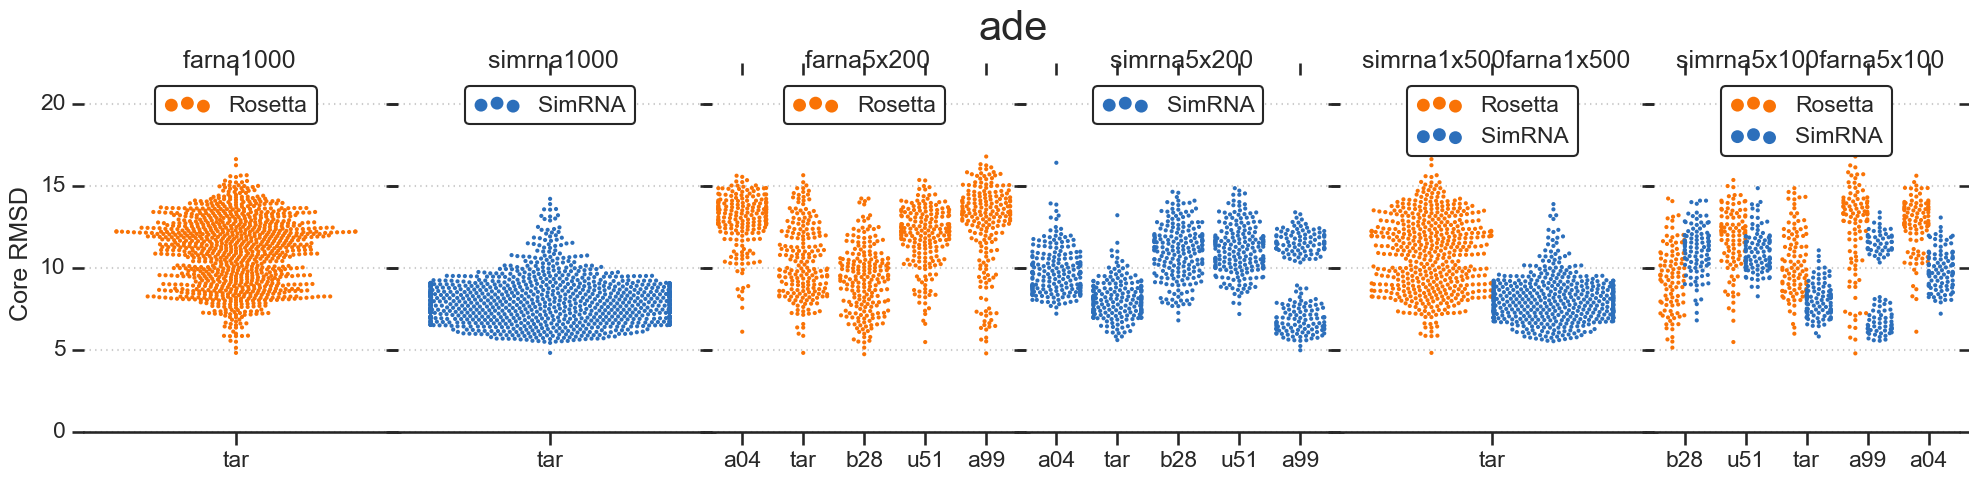

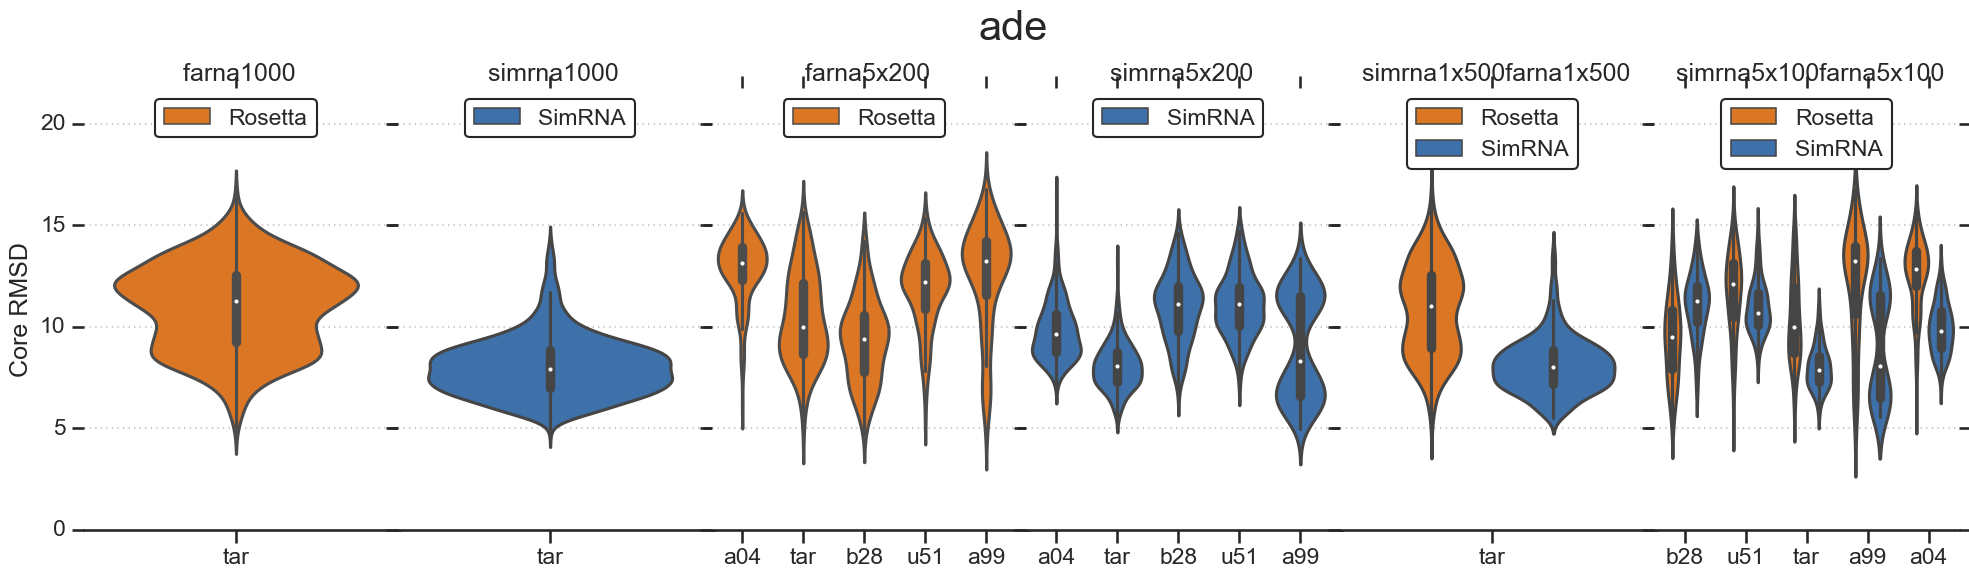

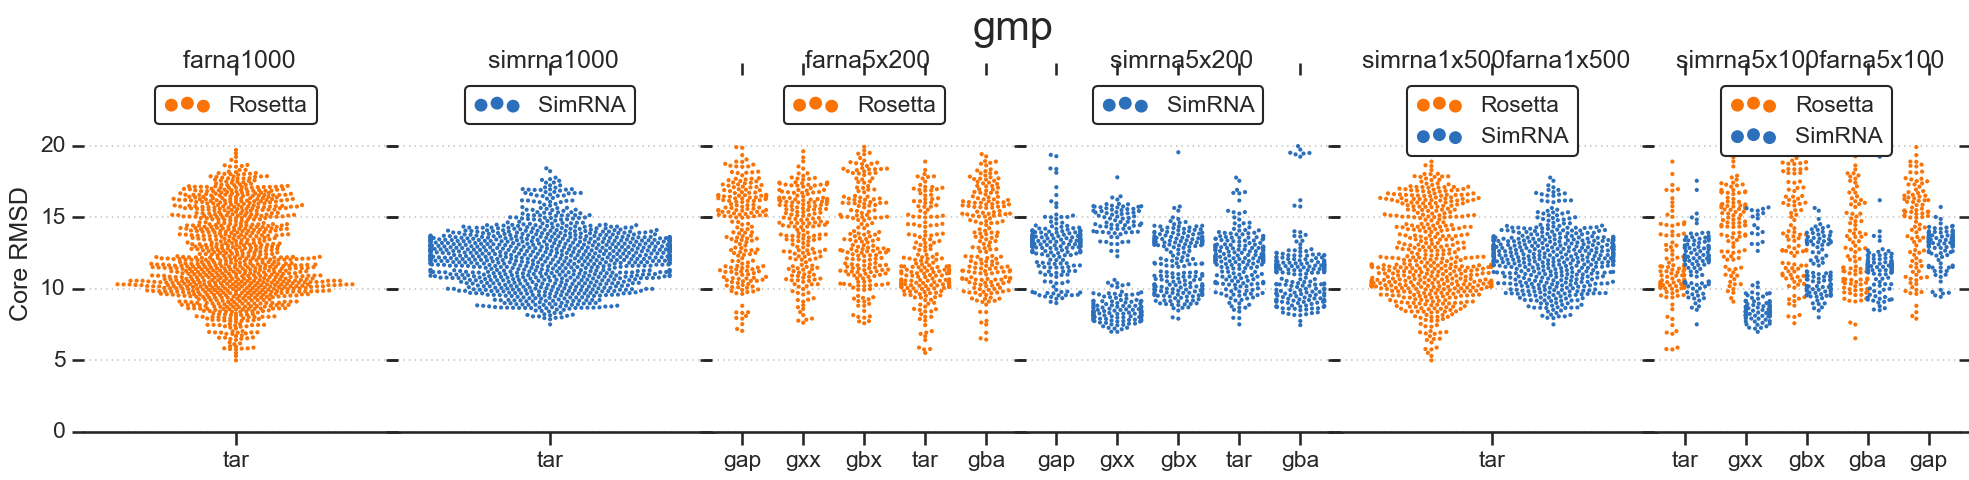

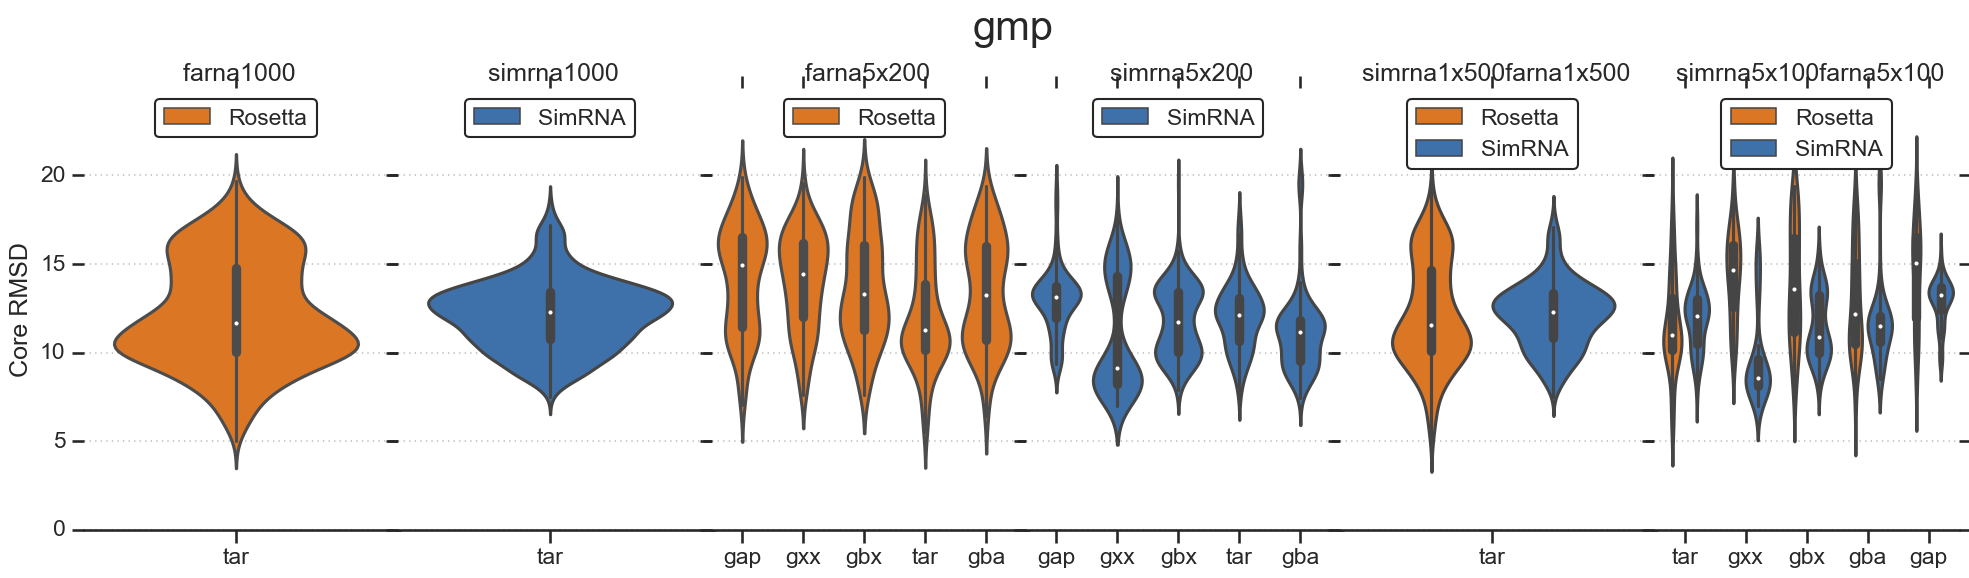

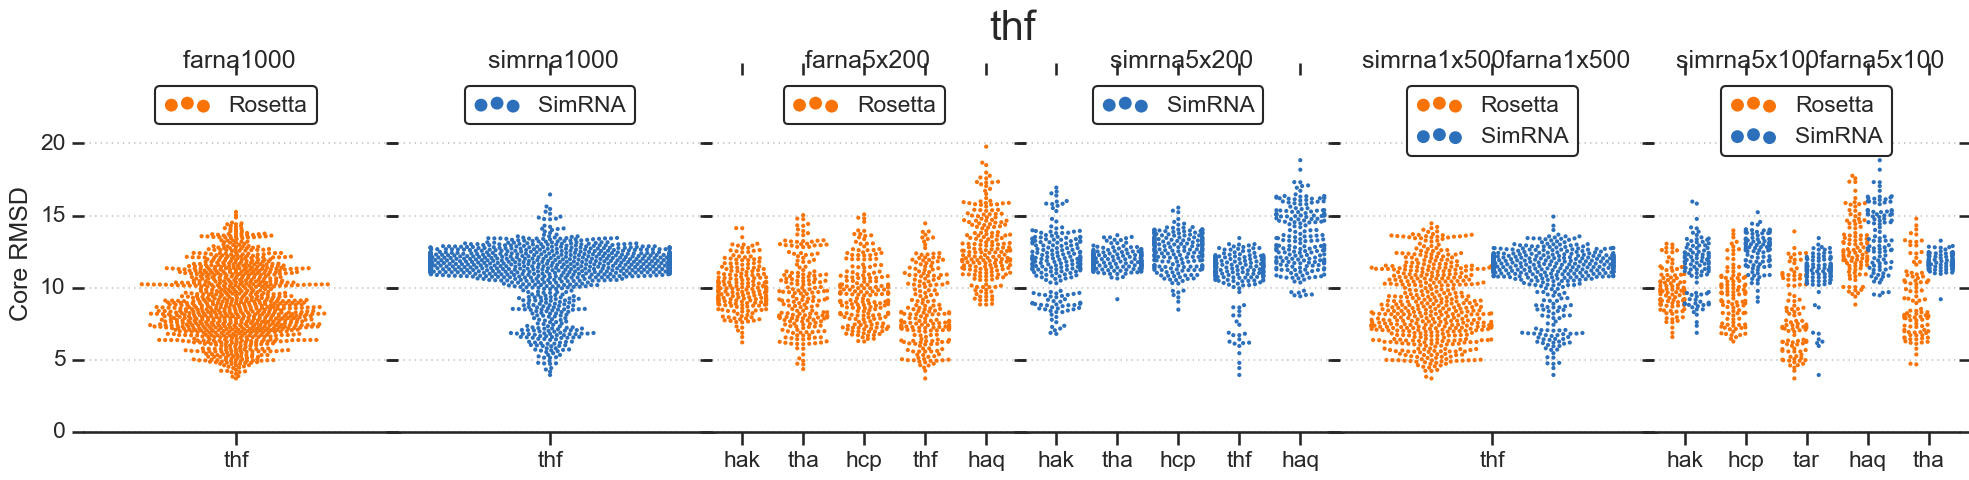

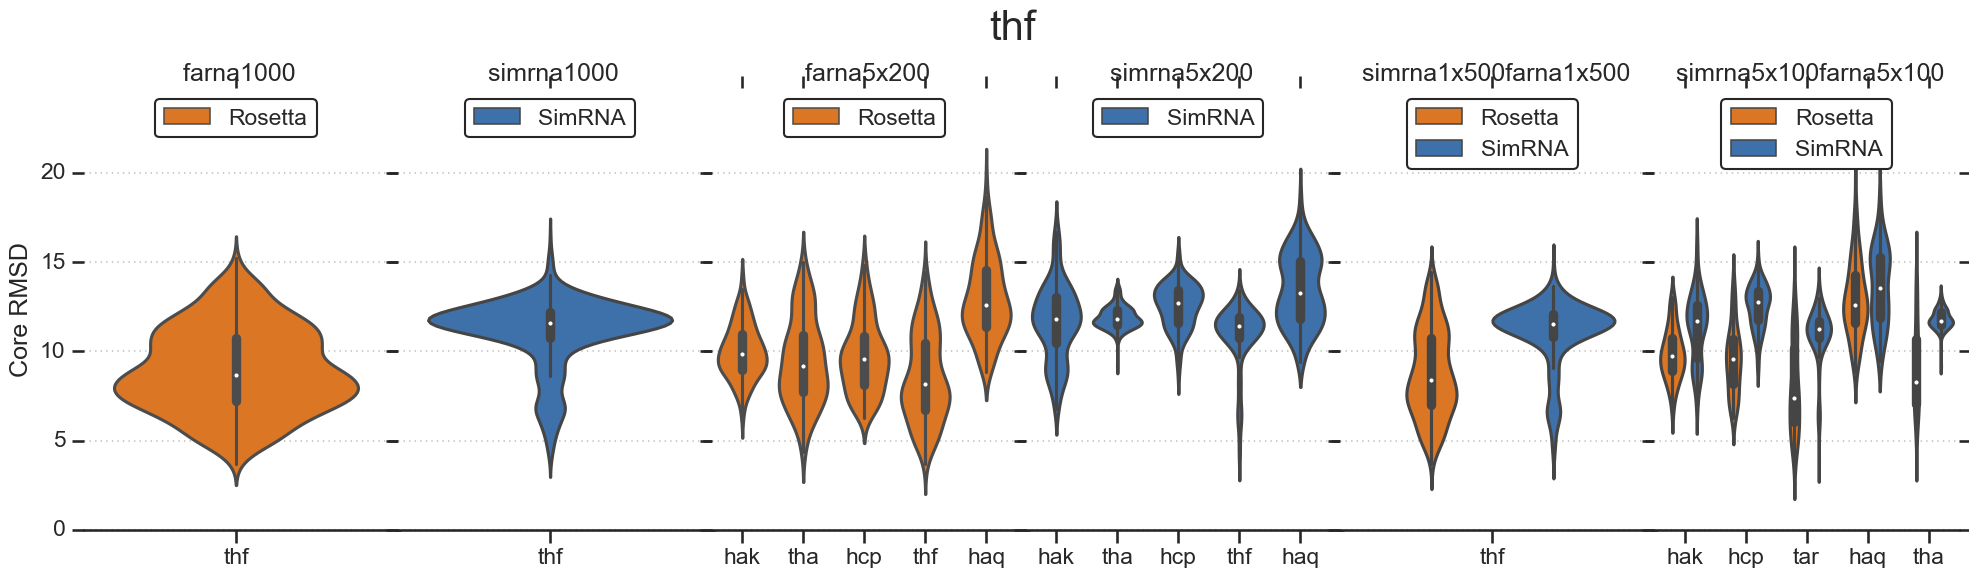

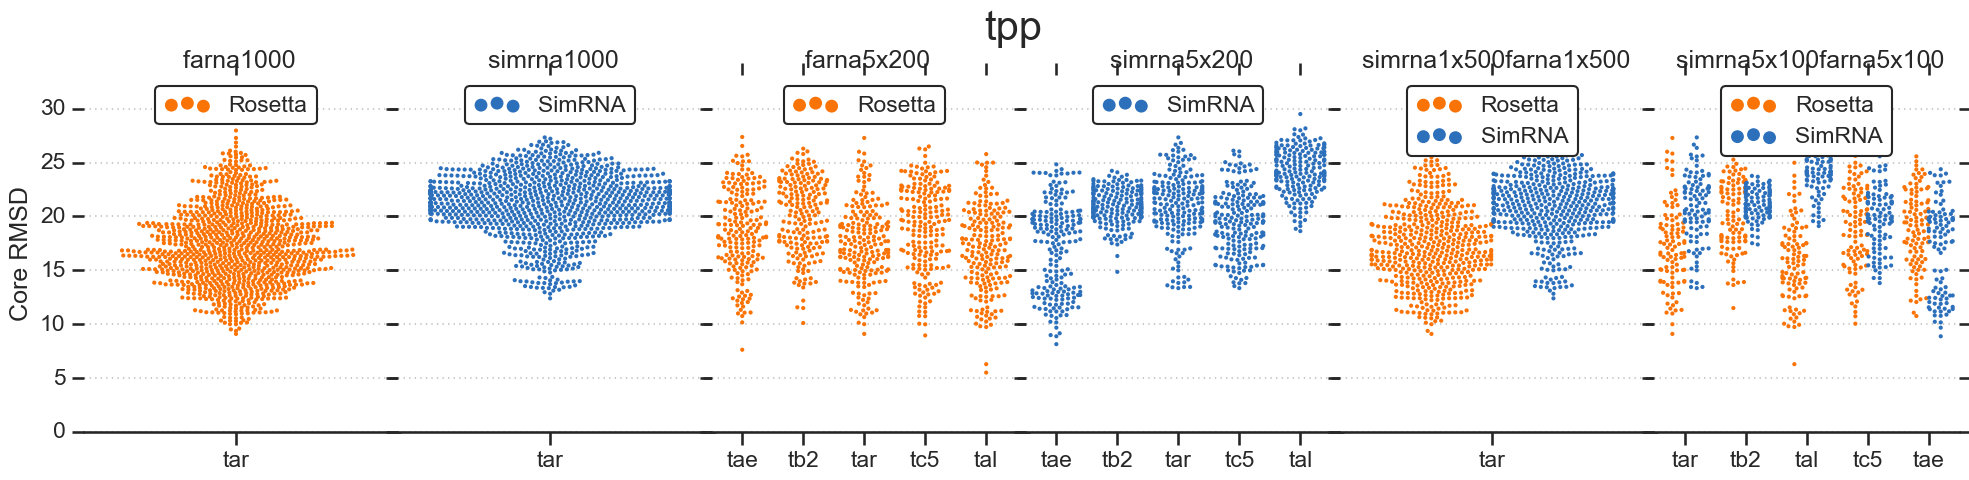

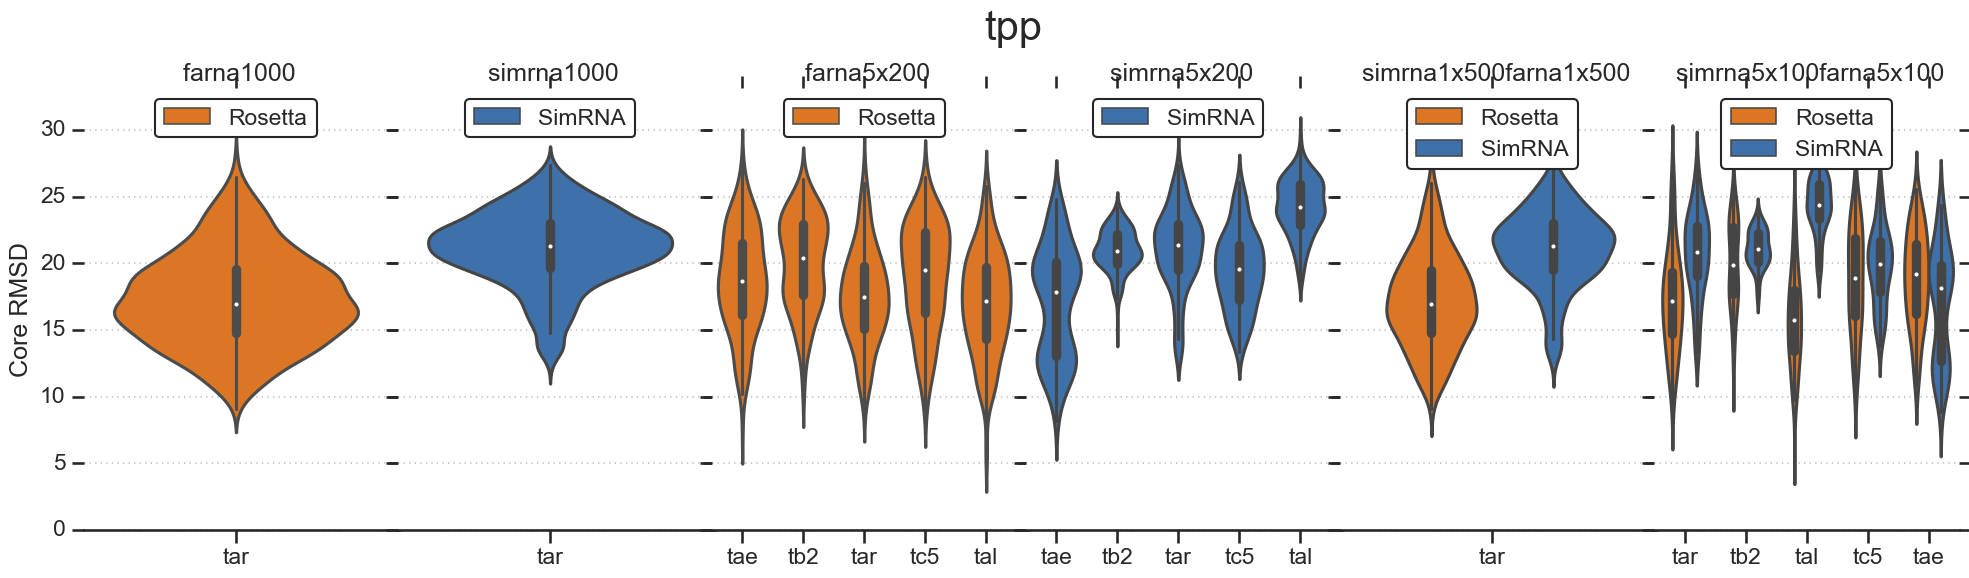

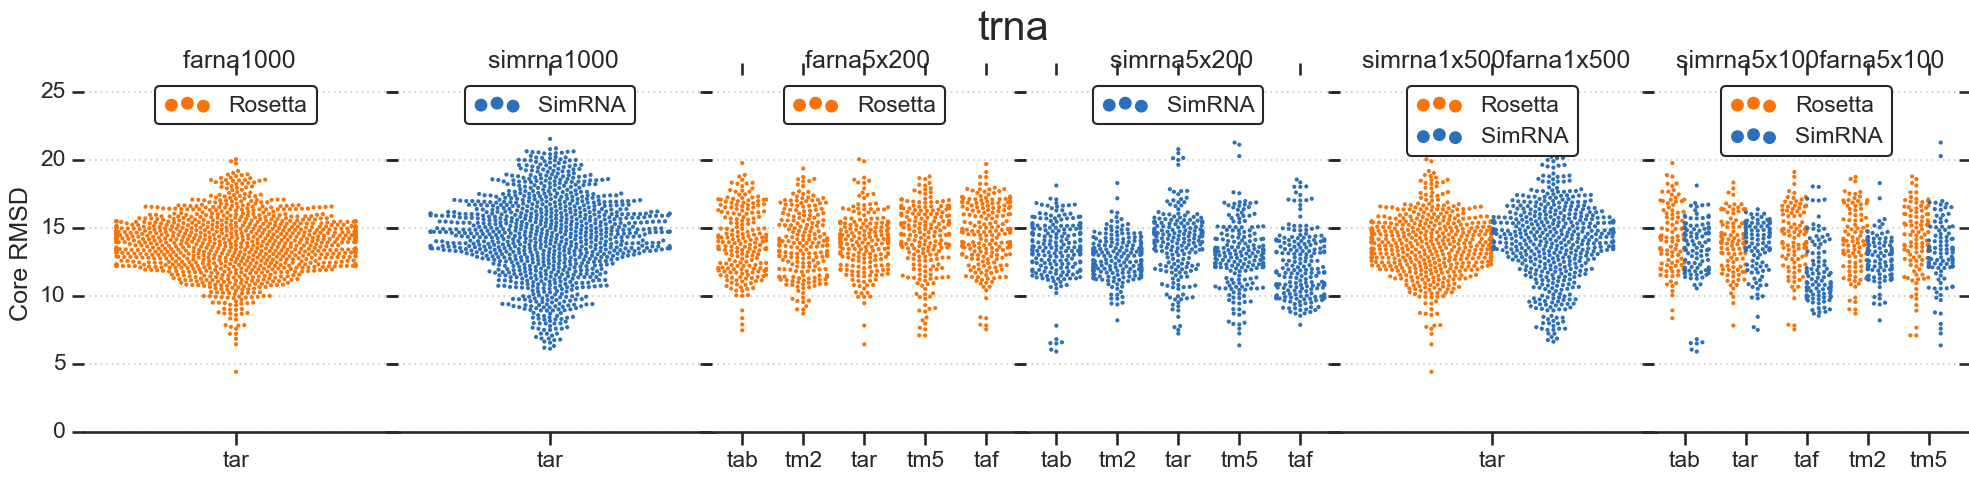

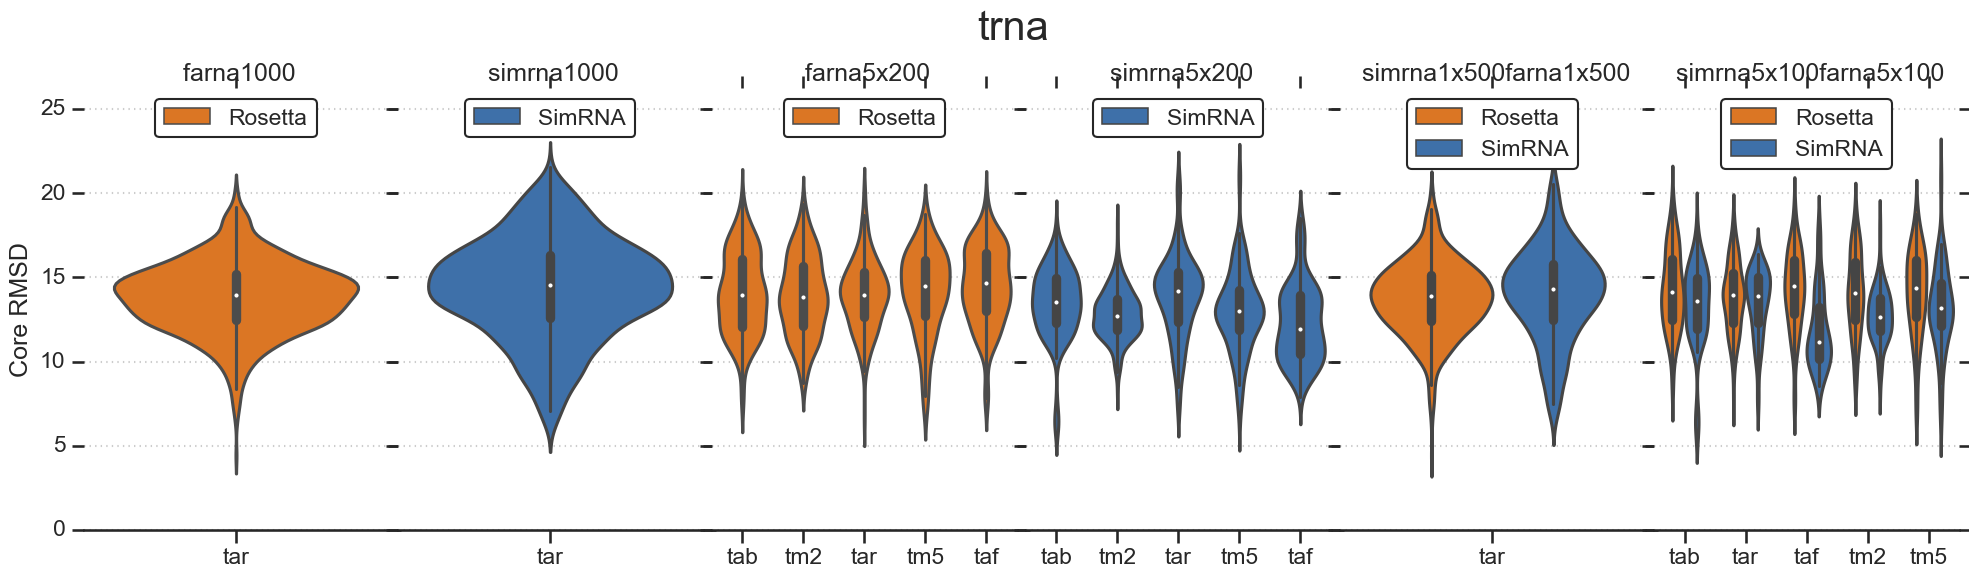

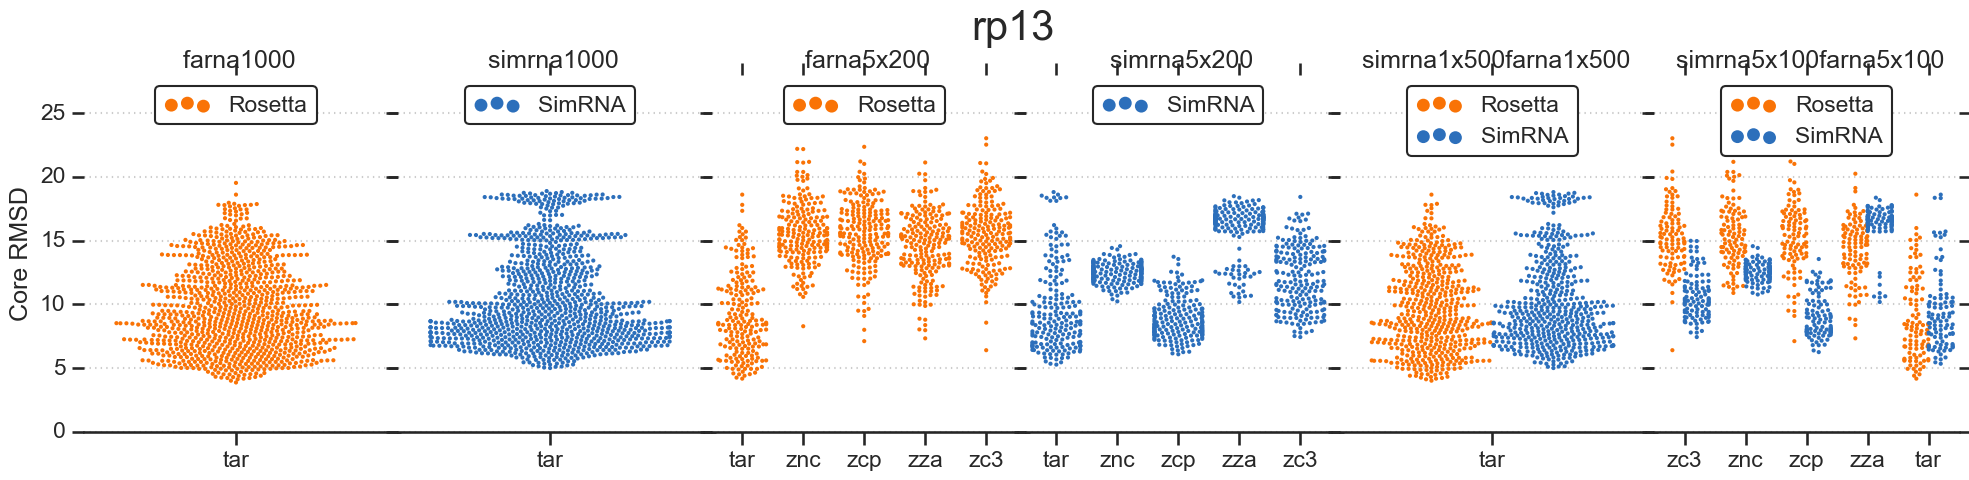

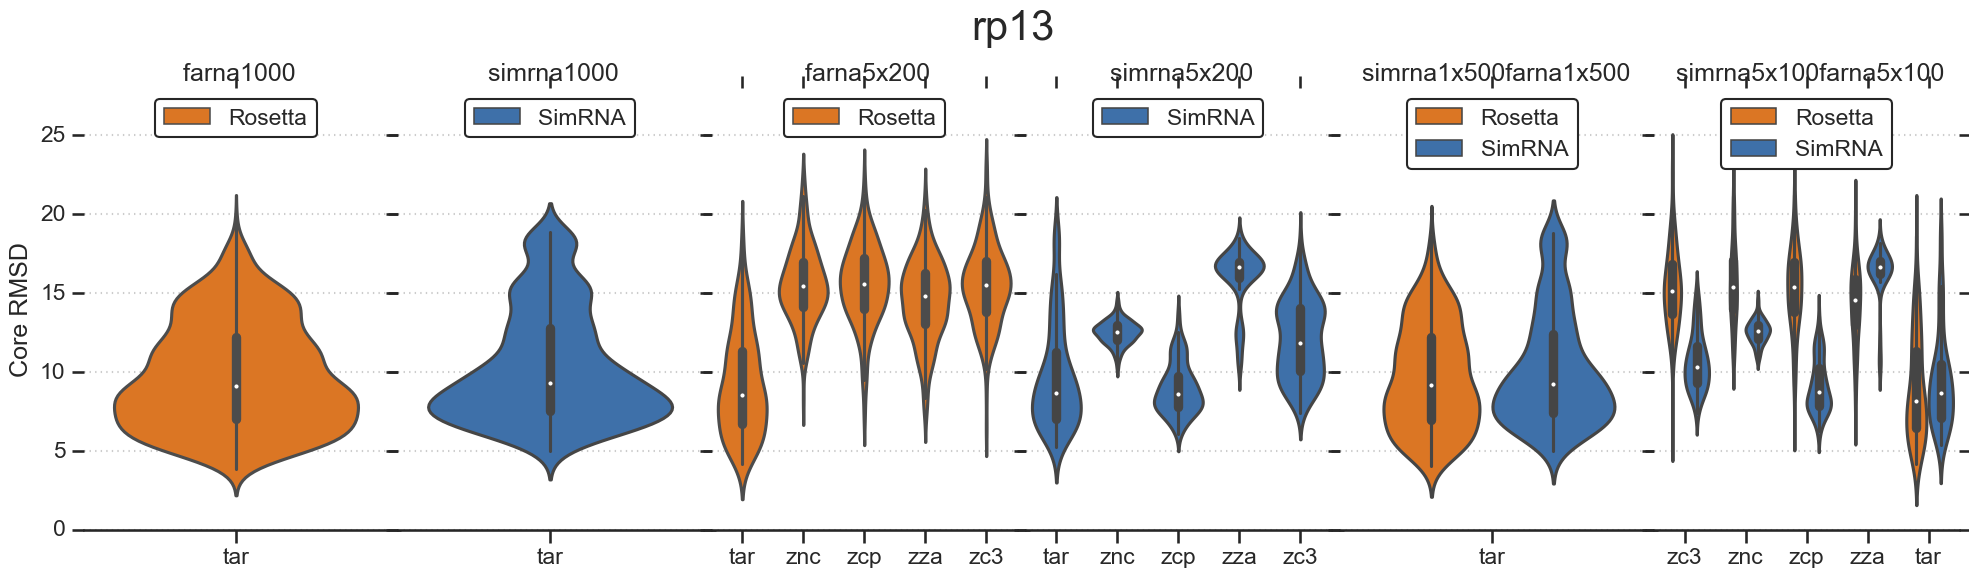

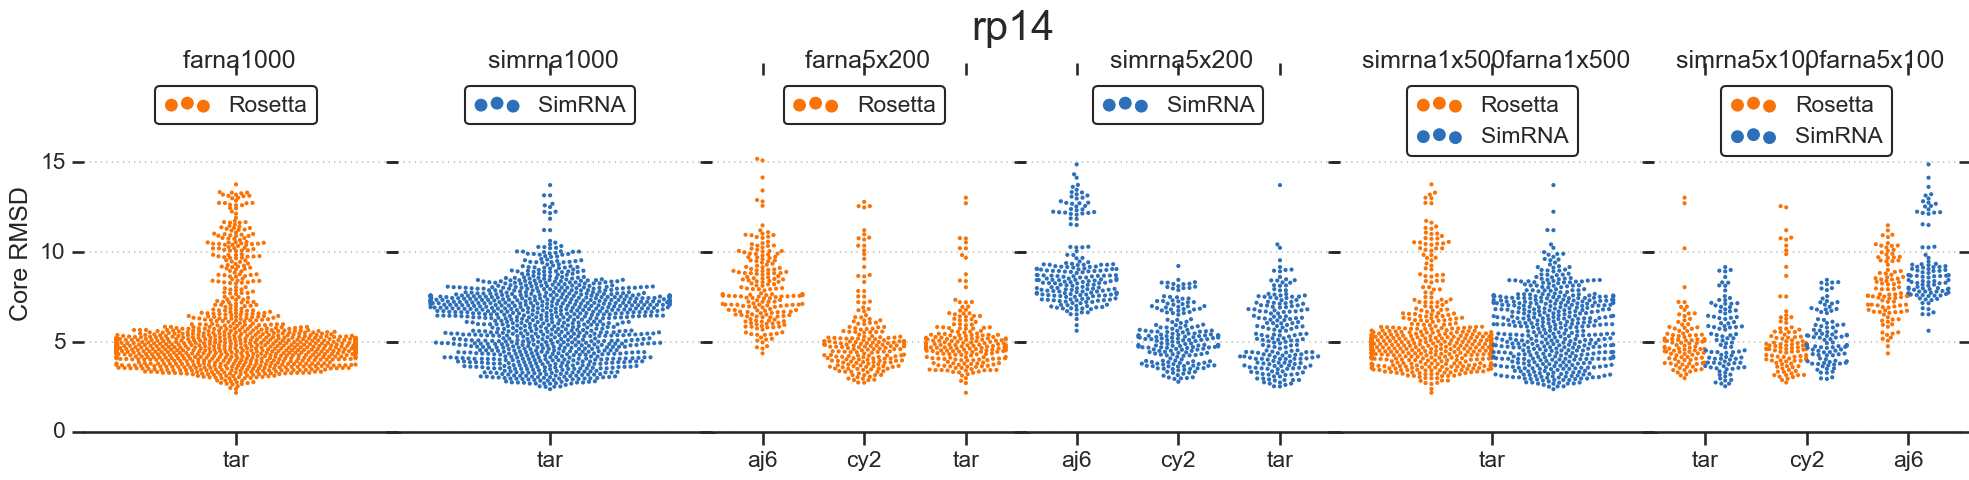

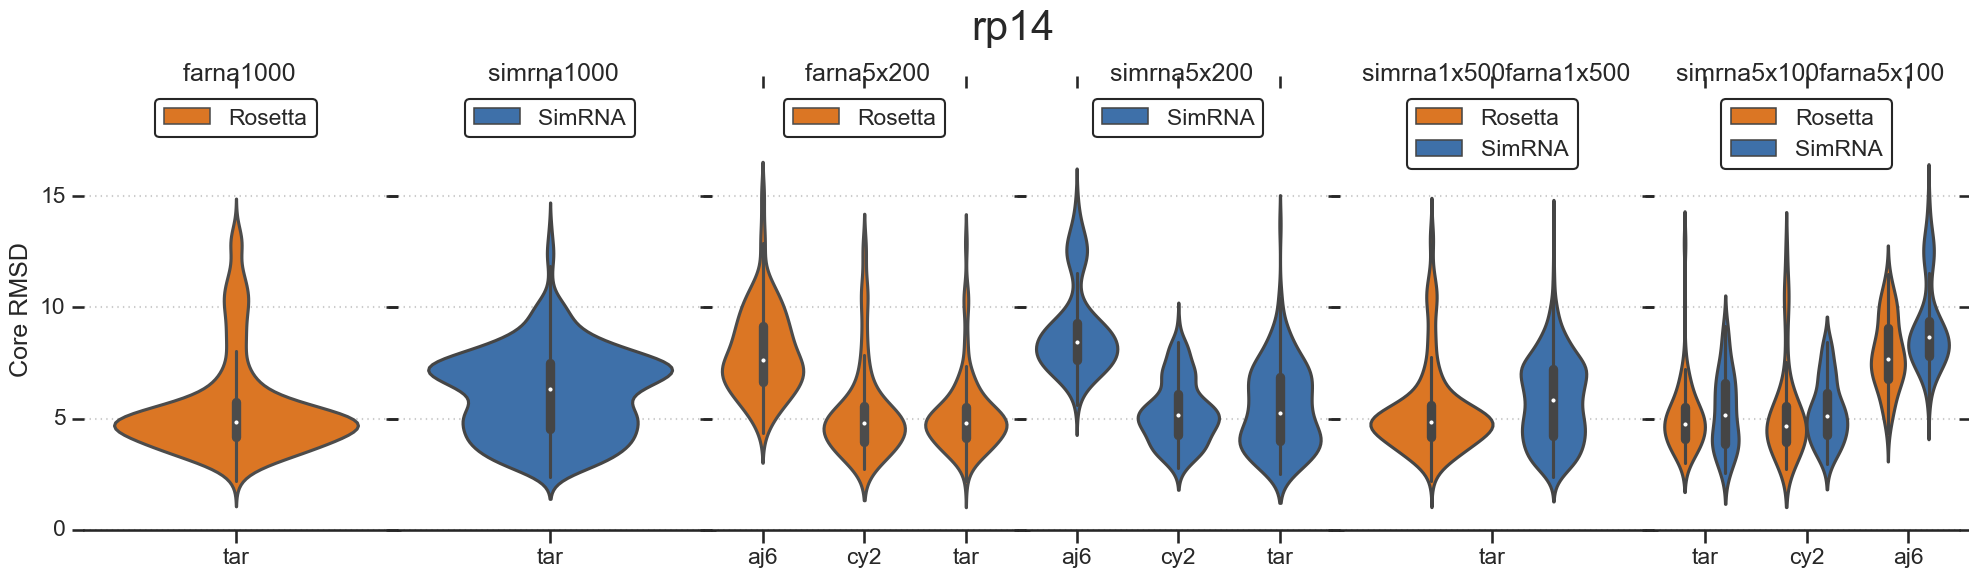

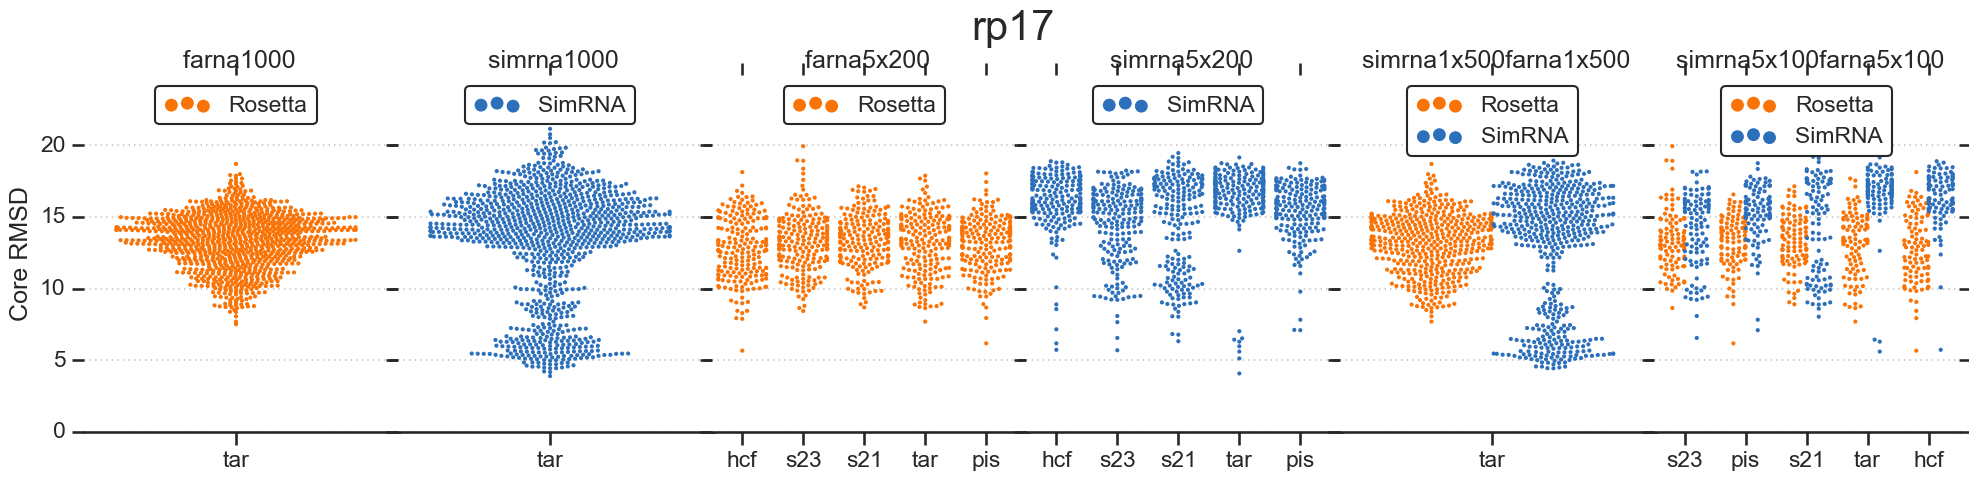

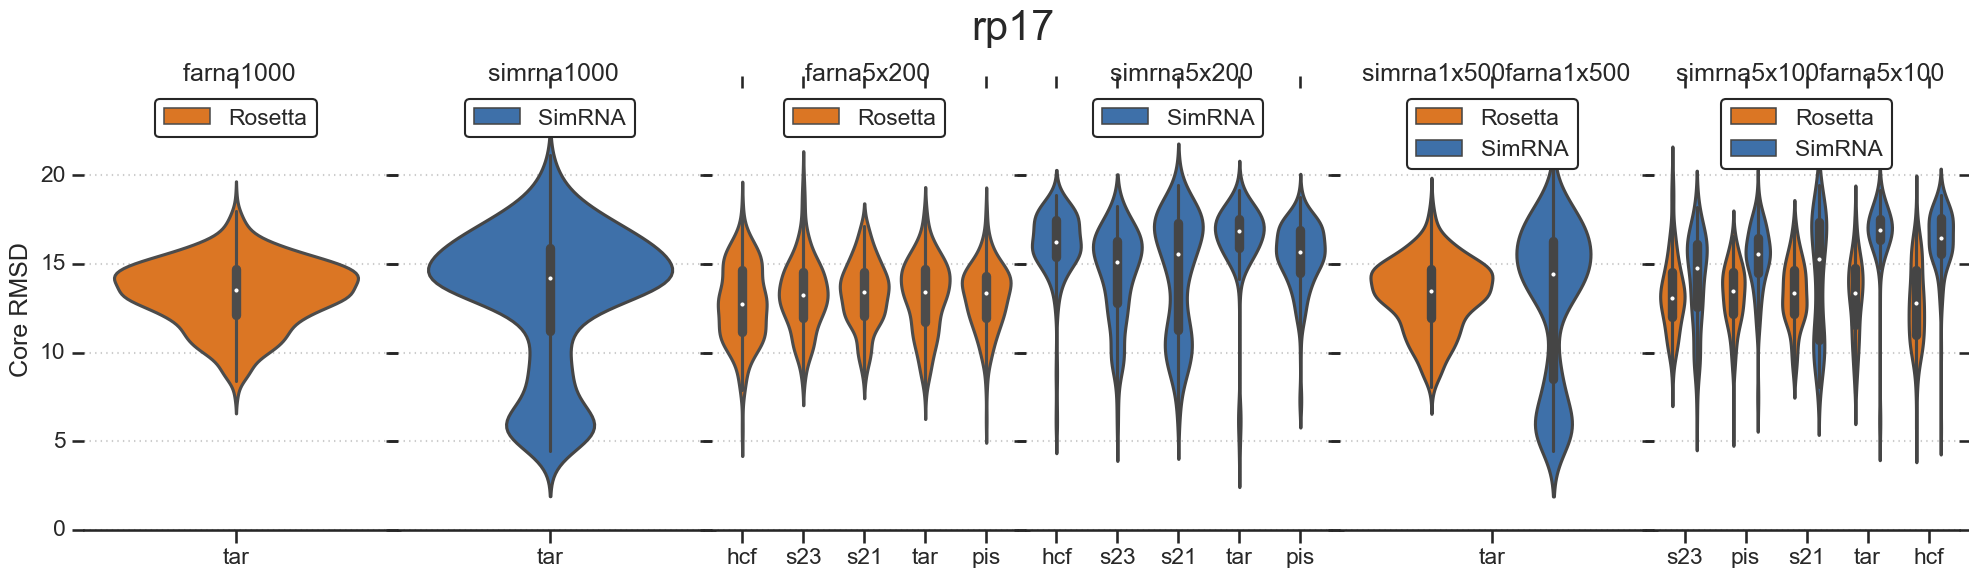

In [27]:
def plot(rna, mode, index, ax, plot_type, path):
    df = load_and_clean_up_data(path, rna, mode)
    """Hakerski sposob aby sprawdzic czy df to jest None - a wiec byl jakis problem z wczytaniem
    macierzy, czy jest to macierze, a wiec dane zostaly wczytane."""
    try:
        df.empty
    except AttributeError:
        return
    
    sns.set(font_scale=0.7)
    sns.set_context("talk")
    sns.set_style("white")
    sns.set_style("ticks")
    sns.despine()
    
    if index == 1:
        plt.set_ylabel('Core RMSD')

    # Remove solution from these plots
    df = df[ df['model'] != 'solution.pdb']
    
    df['Method'] = pd.np.where(df.model.str.contains("AA"), "SimRNA", "Rosetta")  # to lub to <3
    df['group_name'] = df['model'].astype(str).str[:3] # this is a beautiful hack to get different classes of RNA
    df.sort_values(by='group_name', inplace=True)
    c1 = sns.xkcd_rgb["orange"] # "r" #9b59b6"
    c2 = sns.xkcd_rgb["medium blue"] # "b" #34495e"
    flatui = [c1, c2]
    df.sort_values(by='Method', inplace=True)
    #palette = sns.palplot(sns.color_palette(flatui))
    if plot_type == 'swarmplot':
        if 'farna' in mode and 'simrna' not in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' not in mode and 'simrna' in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' in mode and 'simrna' in mode:
            ax = sns.swarmplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1, c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
    else:
        if 'farna' in mode and 'simrna' not in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' not in mode and 'simrna' in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
        if 'farna' in mode and 'simrna' in mode:
            ax = sns.violinplot(y=df.rmsd, x=df.group_name, hue=df.Method, 
                           palette=sns.color_palette([c1, c2]),  dodge=True,
                           ax=ax, size=3)  #  violinplot # boxplot # swarmplot
    # ax.axhline(5, color="black", linewidth=2, linestyle="dashed")        
    sns.despine(left=True)
    ax.set_title(#rna + 
        ' ' + mode)# + ' (' + str(index) + ')')
 
    ax.legend(loc='upper center', #bbox_to_anchor=(0.5, 1.05),
          ncol=1, fancybox=True)#shadow=True)
    ax.set_ylim(0,max(df.rmsd + 5))
    ax.grid(linestyle='dotted', axis='y') 
    ax.set_xlabel('')
    ax.set_ylabel('')
    return

for r in rna:
    no_of_plots = len(modes)

    #swarmplot
    f, axes = plt.subplots(1, no_of_plots, sharey=True, figsize=(20, 5))
    for index, m, a in zip(range(1, no_of_plots + 1), modes, axes):
        plot(r, m, index + 1, a, plot_type="swarmplot", path=path);
    plt.tight_layout()
    plt.suptitle(r, fontsize=30)
    plt.subplots_adjust(wspace=0.03, top=0.85)    
    axes[0].set_ylabel('Core RMSD')

    # violin plot
    if True:
        f, axes = plt.subplots(1, no_of_plots, sharey=True, figsize=(20, 6))
        for index, m, a in zip(range(1, no_of_plots + 1), modes, axes):
            plot(r, m, index + 1, a, plot_type="other", path=path);
        plt.tight_layout()
        plt.suptitle(r, fontsize=30)
        plt.subplots_adjust(wspace=0.03, top=0.85) 
        axes[0].set_ylabel('Core RMSD')  